# 第七章 逻辑回归与采购决策

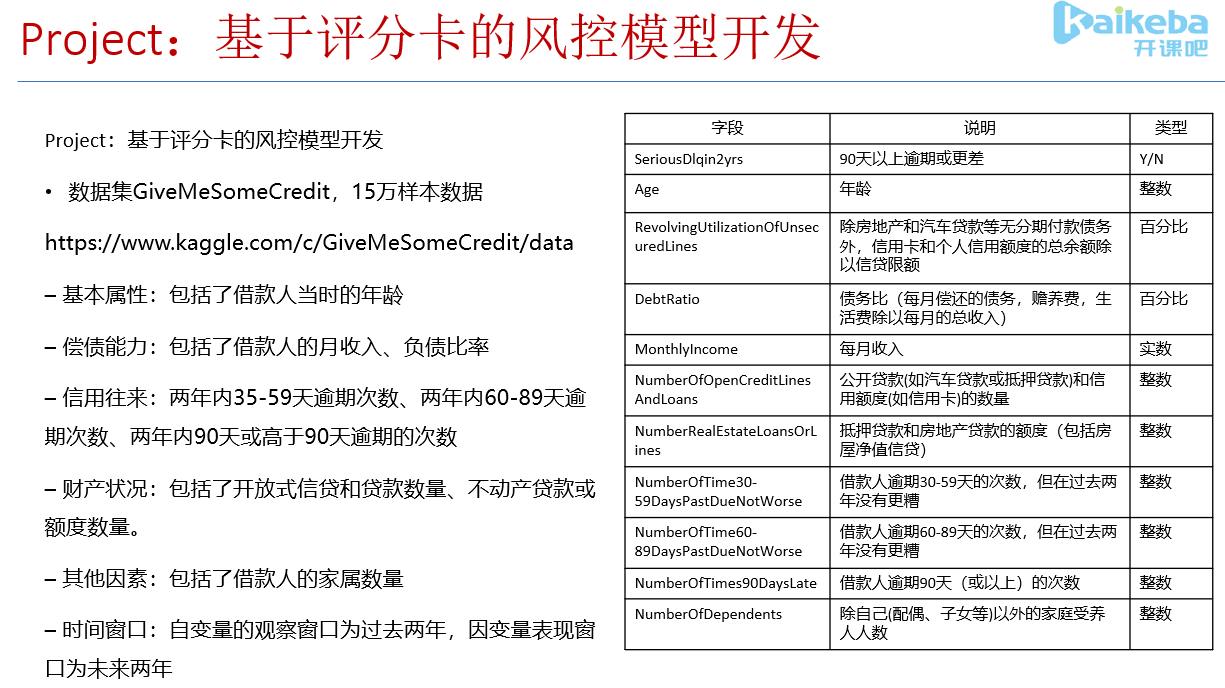

评分卡模型开发步骤：
Step1，数据获取，包括获取存量客户及潜在客户的数据存量客户，已开展融资业务的客户，包括个人客户和机构客户；潜在客户，将要开展业务的客户
Step2，EDA，获取样本整体情况，进行直方图、箱形图可视化
Step3，数据预处理，包括数据清洗、缺失值处理、异常值处理
Step4，变量筛选，通过统计学的方法，筛选出对违约状态影响最显著的指标。主要有单变量特征选择和基于机器学习的方法
Step5，模型开发，包括变量分段、变量的WOE（证据权重）变换和逻辑回归估算三个部分
Step6，模型评估，评估模型的区分能力、预测能力、稳定性，并形成模型评估报告，得出模型是否可以使用的结论
Step7，生成评分卡（信用评分），根据逻辑回归的系数和WOE等确定信用评分的方法，将Logistic模型转换为标准评分的形式
Step8，建立评分系统（布置上线），根据生成的评分卡，建立自动信用评分系统

## Step1，数据探索性分析
违约率分析
缺失值分析
对于某个字段的统计分析（比如RevolvingUtilizationOfUnsecuredLines）


In [40]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [41]:
df_train = pd.read_csv('./cs-training.csv')
df_train = df_train.iloc[:,1:]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [42]:
df_test = pd.read_csv('./cs-test.csv')
df_test = df_test.iloc[:,1:]
df_test

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [38]:
# 去除没用的Unnamed
df_train.drop(columns=df_train.columns[0], inplace=True)
df_test.drop(columns=df_test.columns[0], inplace=True)

In [43]:
df_train.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

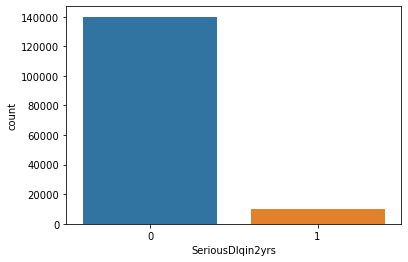

In [44]:
# 违约率SeriousDlqin2yrs进行可视化，90天以上逾期或更差
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs', data=df_train)

In [45]:
# 违约率
df_train['SeriousDlqin2yrs'].sum()/len(df_train)

0.06684

In [46]:
# 缺失值
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [47]:
# 查看某一列的情况
# 除房地产和汽车贷款等无分期付款债务外，信用卡和个人信用额度的总余额除以信贷限额
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

<AxesSubplot:>

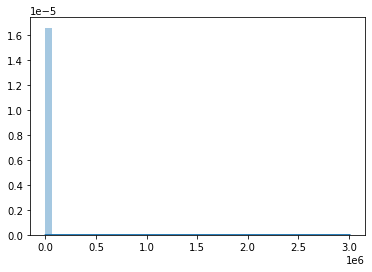

In [48]:
sns.distplot(df_train)

In [49]:
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

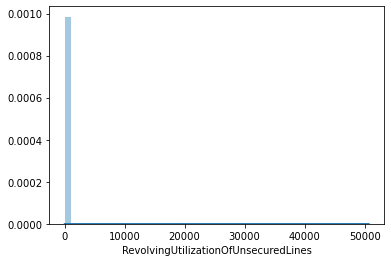

In [50]:
# 直方图看分布
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

## Step2，数据缺失值填充，采用简单规则，如使用中位数进行填充

In [51]:
# 使用中位数填充缺失值
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Step3，数据分箱
1) age [-math.inf, 25, 40, 50, 60, 70, math.inf] age分成6断

2) NumberOfDependents 家属人数 [-math.inf,2,4,6,8,10,math.inf] 

3) NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate三种逾期 
 [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]<br/>
4) 其余字段 RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分五段 qcut(data, q=5)

In [52]:
# 将age进行分箱
import math
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
# 左开右闭
df_train['bin_age'] = pd.cut(df_train['age'], bins=age_bins)
df_train[['age','bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [53]:
# 对NumberOfDependents 家属人数 进行分箱
dependent_bins = [-math.inf,2,4,6,8,10,math.inf]
# 左开右闭
df_train['NumberOfDependents_bins'] = pd.cut(df_train['NumberOfDependents'], bins=dependent_bins)
df_train[['NumberOfDependents','NumberOfDependents_bins']]

,NumberOfDependents,NumberOfDependents_bins
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [54]:
# NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate三种逾期
dpd_bins =  [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=dpd_bins)
# 查看分箱情况
df_train[['bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate']]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [55]:
# RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分五段
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train.RevolvingUtilizationOfUnsecuredLines , q=5, duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train.DebtRatio , q=5, duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train.MonthlyIncome , q=5, duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train.NumberOfOpenCreditLinesAndLoans , q=5, duplicates='drop')
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bin_age,NumberOfDependents_bins,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]"


In [56]:
# 自定义规则分段
loans_bins = [-math.inf, 0, 1, 2, 3, math.inf]
df_train['bin_NumberRealEstateLoansOrLines'] = pd.cut(df_train.NumberRealEstateLoansOrLines , bins=loans_bins)
df_train['bin_NumberRealEstateLoansOrLines'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [57]:
# 统计分箱字段
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

## Step4，特征筛选
使用IV值衡量自变量的预测能力，筛选IV值>0.1的特征字段

In [58]:
import numpy as np
# 计算IV，衡量变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ['Variable', 'Value', 'All', 'Bad']
    # 对feature字段中的每个分箱的取值进行变量
    for i in range(df[feature].nunique()): # unique代表不同的值，nunique = number of unique 不同值的个数
        # feature字段的第i个分箱取值
        val = list(df[feature].unique())[i]
        # 统计feature， feature value， 这个value的个数，这个value导致target=1的个数
#         print(feature)
        lst.append([feature, val, len(df[df[feature]==val]), len(df[(df[feature]==val) & (df[target]==1)])])

    data = pd.DataFrame(lst, columns=cols)
    
    # 筛选bad大于0的情况
    data = data[data['Bad']>0]
    data['Share'] = data['All'] / data['All'].sum() # 这个value所占比例
    data['Bad Rate'] = data['Bad'] / data['All'] # 这个value导致bad情况，在该value个数的比例
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum() #  Margin Bad  bad占所有value的比例
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'] - data['Bad']).sum() 
    # 避免分子为0，导致-inf, log1p(x) = log(1+x), 这里NumberOfTime60-89DaysPastDueNotWorse第8分箱里bad为0
    data['woe'] = np.log1p(data['Margin Bad'] / data['Margin Good'])
    data['iv']  = ((data['Margin Bad'] - data['Margin Good']) * data['woe']).sum()
    data.sort_values(by=['Variable', 'Value'], inplace=True)
    
    return (data['iv'][0])

In [59]:
cal_IV(df_train, 'bin_age', 'SeriousDlqin2yrs')

0.10630739209281982

In [60]:
# 计算每个字段的IV值
for f in bin_cols:
    print(f, cal_IV(df_train, f, 'SeriousDlqin2yrs'))

bin_age 0.10630739209281982
bin_NumberOfTime30-59DaysPastDueNotWorse 0.3406105523141427
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2032930463579644
bin_NumberOfTimes90DaysLate 0.3747036585092075
bin_RevolvingUtilizationOfUnsecuredLines 0.5271795713507914
bin_DebtRatio 0.031720271879942336
bin_MonthlyIncome 0.028071864778230878
bin_NumberOfOpenCreditLinesAndLoans 0.025007537468361242
bin_NumberRealEstateLoansOrLines 0.03150600847435313


In [52]:
# 计算每个字段的IV值
for f in bin_cols:
    print(f, cal_IV(df_train, f, 'SeriousDlqin2yrs'))

bin_age 0.24041120302785982
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.06167337290177645


只选择iv>0.1的

#### 例如RevolvingUtilizationOfUnsecuredLines有很突出的数值，很容易导致违约，类似标签泄露

In [67]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [61]:
# 总的违约10026
df_train.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

### 只选择IV>0.1的字段：
* bin_age
* bin_NumberOfTime30-59DaysPastDueNotWorse
* bin_NumberOfTime60-89DaysPastDueNotWorse
* bin_NumberOfTimes90DaysLate
* bin_RevolvingUtilizationOfUnsecuredLines

## Step5，对于筛选出来的特征，计算每个bin的WOE值

In [62]:
# 保留的字段
feature_cols = ['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate','bin_RevolvingUtilizationOfUnsecuredLines','bin_age']

In [63]:
# 计算这些特征的woe
def cal_WOE(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum', 'count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns={target+'sum':'bad', target+'count':'all'})
        # print(df_woe)
        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['Margin Bad'] = df_woe['bad'] / df_woe['bad'].sum() 
        df_woe['Margin Good'] = df_woe['good'] / df_woe['good'].sum()
        # 1p避免分母为0
        df_woe['woe'] = np.log1p(df_woe['Margin Bad'] / df_woe['Margin Good'])
        # 避免重名
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe, on=f, how='left')
#         print(df_woe)
    return df_new
# 计算这些特征的WOE
df_woe = cal_WOE(df_train, bin_cols, 'SeriousDlqin2yrs')

In [64]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,Margin Bad_bin_NumberOfOpenCreditLinesAndLoans,Margin Good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,Margin Bad_bin_NumberRealEstateLoansOrLines,Margin Good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184121,0.184591,0.691873,419,3652,3233,0.041791,0.023097,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.156892,0.178405,0.630962,4672,56188,51516,0.465988,0.368040,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.201177,0.251082,0.588475,2748,52338,49590,0.274087,0.354280,0.573037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,25838,0.184121,0.184591,0.691873,2748,52338,49590,0.274087,0.354280,0.573037
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076


In [65]:
feature_cols = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','RevolvingUtilizationOfUnsecuredLines','age']

In [66]:
# 得到WOE规则 feature, bin, woe
df_bin_to_woe = pd.DataFrame(columns=['features', 'bin', 'woe'])
for f in feature_cols:
    b = 'bin_' + f
    w = 'woe_bin_' + f
    df = df_woe[[w, b]].drop_duplicates()
    df.columns = ['woe', 'bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe, df])

df_bin_to_woe

,features,bin,woe
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
251,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
423,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860
1052,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6909,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
10822,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007


## Step6，使用逻辑回归进行建模

In [67]:
woe_cols = [c for c in df_woe.columns if 'woe' in c]
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

In [68]:
# 数据切分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=33)

In [69]:
x_train

,woe_bin_age,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_NumberOfTime60-89DaysPastDueNotWorse,woe_bin_NumberOfTimes90DaysLate,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_DebtRatio,woe_bin_MonthlyIncome,woe_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberRealEstateLoansOrLines
106833,0.813822,0.572521,0.645352,0.608707,0.243890,0.651857,0.882076,0.882845,0.573037
126865,0.955231,0.572521,0.645352,0.608707,0.243890,0.597328,0.698081,0.882845,0.818076
21011,0.406848,0.572521,0.645352,0.608707,0.243890,0.613576,0.643114,0.630962,0.573037
31844,0.406848,0.572521,0.645352,0.608707,0.211221,0.928274,0.882076,0.633824,0.603269
133133,0.955231,0.572521,0.645352,0.608707,1.495914,0.597328,0.698081,0.882845,0.818076
...,...,...,...,...,...,...,...,...,...
34877,0.955231,0.572521,0.645352,0.608707,1.495914,0.645506,0.882076,0.882845,0.818076
147558,0.813822,1.797837,0.645352,0.608707,0.720083,0.928274,0.882076,0.633824,0.603269
75971,0.279404,0.572521,0.645352,0.608707,0.211221,0.597328,0.698081,0.630962,0.818076
131650,0.813822,0.572521,0.645352,0.608707,0.350952,0.645506,0.698081,0.630962,0.818076


In [70]:
# 利用LR模型预测 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, roc_auc_score
lr = LogisticRegression(random_state=33)
model = lr.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred, y_test))
print(roc_auc_score(y_pred, y_test))

0.9360333333333334
0.7706007341913056


## 总结

1. 将模型目标标量为1记为违约用户，对于目标变量为0记为正常用户；则WOE(weight of Evidence)其实就是自变量取某个值的时候对违约比例的一种影响
2. IV衡量的是某一个变量的信息量，从公式来看的话，相当于是自变量woe值的一个加权求和，其值的大小决定了自变量对于目标变量的影响程度
3. 在建立评分卡的过程中，首先进行了数据清洗，对缺失值和异常值进行了处理并对数据分布进行了宏观展示。然后对特征值进行了处理，将连续的变量分箱，同时计算了woe和iv值，并保留了iv值较高的变量对其woe转化。最后将woe转化后的数据进行逻辑回归分析，
4. 做信用评分模型时，自变量的处理过程（包括编码与筛选）很大程度上是基于对单变量模型效果的评价。而在这个评价过程中，ROC与IV是从不同角度考察自变量对目标变量的影响力，基于这种考察，我们用WOE值对分类自变量进行编码，从而能够更直观地理解自变量对目标变量的作用效果及方向，同时提升预测效果

